# Titanic Project

## Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [176]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error


In [177]:
# loading the dataset
df=pd.read_csv(r'C:\Users\tusha\Downloads\titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### This dataset is the most popular dataset which is mostly used to demonstrate the understanding of machine learning from basics. This dataset has all the information like how many passengers werer there in the ship, how many are male,female. Now this dataset is used to predict whether an arbitrary passenger survived or not.

In [178]:
# the above dataset has the various types of features like categorical,binary, ordinal, continuous, count, other.
# Embarked lies in categorical.
# Pclass lies in ordinal.
# Age, Fare lies in Numerical/continuous
# Sex lies in Binary
# Sibsp, parch falls in Count.
# passengerId, Name, Cabin, Ticket all these lies in other which donot contribute in any outcome of ML.

In [179]:
#importing the required library
import seaborn as sns

In [180]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [181]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### from above we can conclude that only 38% managed to survive this disaster.
##### we can also see that from age of 0.42 to 80 year passenger managed to survive.


In [182]:
# .describe()  show the count, mean ,standard deviation, min, maximum,etc
# in this we can also observe that mean and 50% are almost equal.
# count will tell that how many values are there, and it also tells about the missing value, if all the values are not equal.
# in this it can be clearly seen that age has missing values.
# it also tell about mean value, standard deviation, minimum and maximum value can also be obtained.
# 50% tell about the median value.


# we can also get the information about the outliers also which is difference between mean and median value.
# from above values it can be observed that there are outliers in the dataset.

In [183]:
# checking the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [184]:
# from above output we can see that there is 177 missing values in "age", 687 in "cabin", and 2 in "Embarked".
# The missing values need to be filled with approximate values.

In [185]:
# determining the shape and size of the dataset
df.shape

(891, 12)

In [186]:
# the no. of rows are 891 and 12 columns.
# row represents each passenger
# column represents each attributes of each passenger.

In [187]:
# determining the datatypes of each column\attribute.
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [188]:
# as it can be seen that passengerId, survived, Pclass,sibsp and Parch are of integer datatypes.
# Name,sex,ticket,cabin and embarked are of object type data types.
# age and fare are of float type datatypes.

In [189]:
# to determine the no. of missing value from each attributes.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [190]:
# there are many missing values
# from age column there are 177 missing values, cabin has 687 missing values and embarked has 2 missing values.

## Univariate Analysis

In [191]:
df.Survived.value_counts(normalize=True,sort=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [192]:
# From above data we can see that only 38.38% managed to survive 
# and 61.61 passenger didn't survive.

C:\Users\tusha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tusha\anaconda3\lib\si

<AxesSubplot:xlabel='Age', ylabel='Density'>

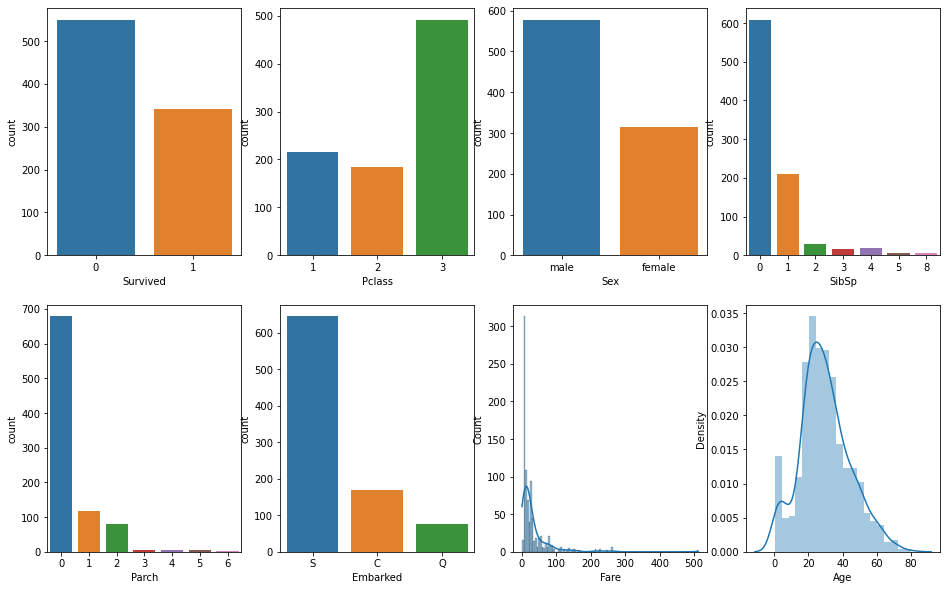

In [193]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('Survived',data=df,ax=axes[0,0])
sns.countplot('Pclass',data=df,ax=axes[0,1])
sns.countplot('Sex',data=df,ax=axes[0,2])
sns.countplot('SibSp',data=df,ax=axes[0,3])
sns.countplot('Parch',data=df,ax=axes[1,0])
sns.countplot('Embarked',data=df,ax=axes[1,1])
sns.histplot(df['Fare'], kde=True,ax=axes[1,2])
sns.distplot(df['Age'].dropna(),kde=True,ax=axes[1,3])

In [194]:
# Pclass 3 survived more it means that rich people survived more.
# SibSp refers to no. of siblings or spouse the person was with.
# from graph it can be refered as that alone person were most.

## Bivariate Analysis

In [195]:
# the relation between fare and survived one is very minute.
# The relation between Pclass 1 and survival rate is 60% but pclass 3 survival rate is 22% which is not good.


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

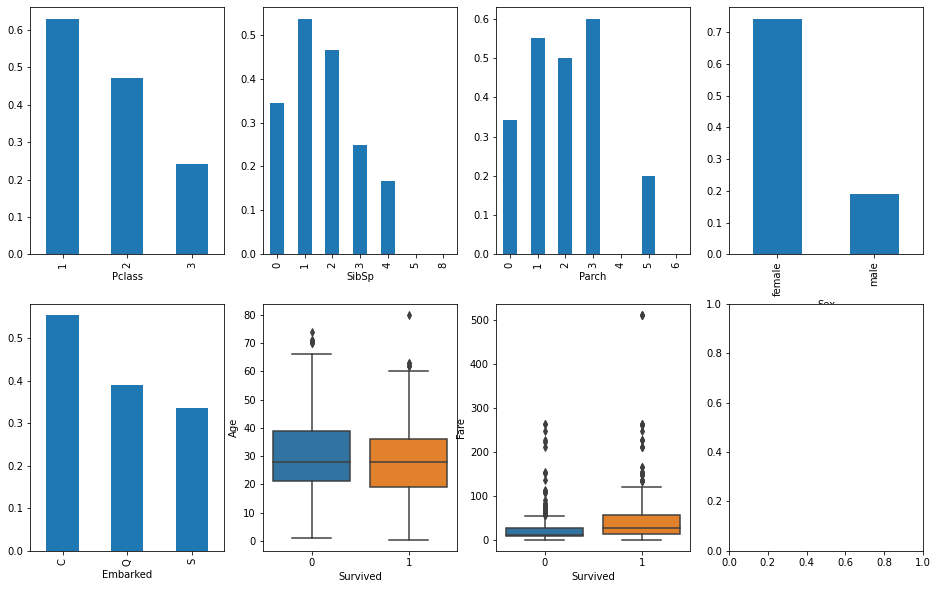

In [196]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
df.groupby('Pclass')['Survived'].mean().plot(kind='bar',ax=axesbi[0,0],xlim=[0,1])
df.groupby('SibSp')['Survived'].mean().plot(kind='bar',ax=axesbi[0,1],xlim=[0,1])
df.groupby('Parch')['Survived'].mean().plot(kind='bar',ax=axesbi[0,2],xlim=[0,1])
df.groupby('Sex')['Survived'].mean().plot(kind='bar',ax=axesbi[0,3],xlim=[0,1])
df.groupby('Embarked')['Survived'].mean().plot(kind='bar',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=df,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=df,ax=axesbi[1,2])

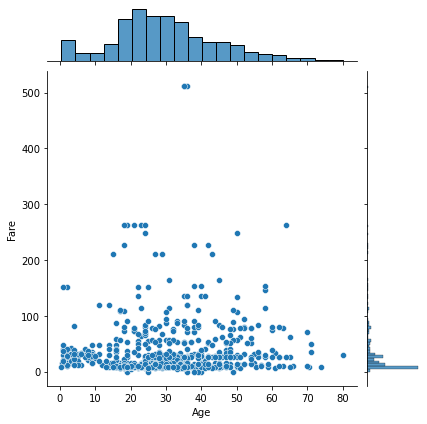

In [197]:
sns.jointplot(x="Age",y="Fare",data=df);

In [198]:
# jointplot : in this it draws multiple bivariate plots with univariate marginal distributions.
# for Age the distribution is good.
# for fare it can be seen that outlier are present beyond 300, which is need to be removed

## Multivariate Analysis

In [199]:
corr_mat=df.corr()
# .corr()   it is used to calculate the correlation betweem all the available columns in the dataset.
corr_mat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [200]:
# from the correlation matrix we can see the strong relation in Parch, fare, Pclass and cabin

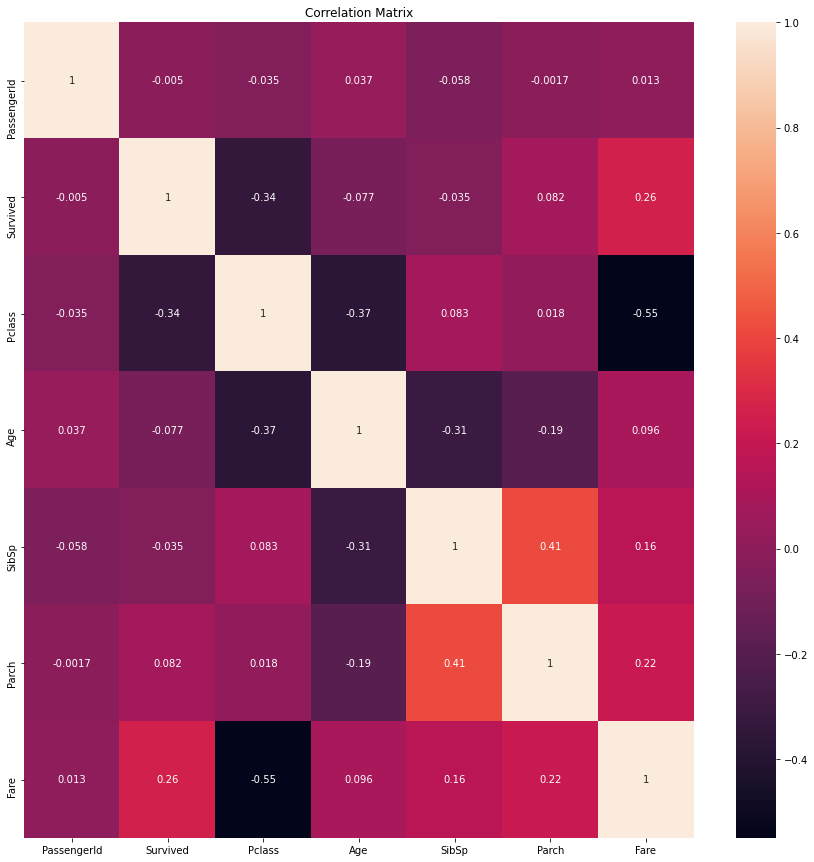

In [201]:
plt.figure(figsize=[15,15])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [202]:
# from the heatmap and the correlation matrix we can see the strong relation in Parch, fare, Pclass and cabin

## Imputing missing values

### Fixing the missing value of Age

In [203]:
# replacing the missing value by mean values.
# in this process mean based on sex and Pclass can be taken.

#### Since age is a numerical value let's fill it with mean value.

In [204]:
age=df.groupby(['Sex','Pclass'])['Age'].mean()
age

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [205]:
# from above result we can see that female from Pclass 1 , 2,3 mean value are 34.6, 28.72 and 21.75
# for male mean value for age from Pclass1,2,3 are 41.28, 30.7 and 26.50.

In [206]:
df["Age"][df["Age"].isna()] = df["Age"].mean()
df.count()

<ipython-input-206-579590a5069e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"][df["Age"].isna()] = df["Age"].mean()


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

## fixing the missing cabin values

In [207]:
#Now filling the cabin's missing values.
# cabin column has missing values more than 75% 

In [208]:
df["Cabin"]=df["Cabin"].isna()

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    bool   
 11  Embarked     889 non-null    object 
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 77.6+ KB


In [210]:
# as it can be observed that cabin missing values have been filled with na values.

# Modelling

In [211]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [212]:
# dropping the row which has the missing values in it.
df=df.dropna()

In [213]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,True,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,False,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,True,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,False,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,True,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,True,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,False,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,True,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,False,C


In [214]:
# here we can see that two rows have been dropped from the dataframe.
# from this we can say that embarked with two missing values has been dropped.

In [215]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [216]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,True,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,False,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,True,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,False,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,True,S


In [217]:
# we don't have any use of PassengerId, Name, Ticket and Cabin 
# so we will drop it from the dataset.

In [218]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
Columns = ['PassengerId','Name','Ticket','Cabin']
df = df.drop(Columns,axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [219]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Data Pre-Processing

### converting ordinal categorical columns into numerical data


In [220]:
# Converting variable sex to numeric
df['Sex'].replace({'female':0, 'male':1}, inplace=True)

In [221]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,S
1,1,1,0,38.000000,1,0,71.2833,C
2,1,3,0,26.000000,0,0,7.9250,S
3,1,1,0,35.000000,1,0,53.1000,S
4,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S
887,1,1,0,19.000000,0,0,30.0000,S
888,0,3,0,29.699118,1,2,23.4500,S
889,1,1,1,26.000000,0,0,30.0000,C


In [222]:
# converting all the nominal variables using dummy variables
df_num=pd.get_dummies(df)

# Adding Target Variable to the data
df_num['Survived']=df['Survived']


df_num

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,0,1
888,0,3,0,29.699118,1,2,23.4500,0,0,1
889,1,1,1,26.000000,0,0,30.0000,1,0,0


## Splitting the data into training and testing

In [223]:
target='Survived'
predict=['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q','Embarked_S']

X=df_num[predict].values
y=df_num[target].values

# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Normalization of data

In [224]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Normalization
# On this data Min Max Normalization produces better results

# MinMAx normalization
predictScaler=MinMaxScaler()

# Storing fit object for further reference
predictScalerFit=predictScaler.fit(X)

# Generating the standard value of X
X=predictScalerFit.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [225]:
X_train
y_train
X_test
y_test

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1], dtype=int64)

# Using different model to obtain the accuracy result

## Logistic Regression model

In [226]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)


In [227]:

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))


              precision    recall  f1-score   support

           0       0.85      0.82      0.83       167
           1       0.71      0.75      0.73       100

    accuracy                           0.79       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.79      0.79       267



In [228]:
print(metrics.confusion_matrix(y_test, prediction))


[[137  30]
 [ 25  75]]


In [229]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


Accuracy of the model on Testing Sample Data: 0.79


In [230]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.77388248 0.77641044 0.77021909 0.82182649 0.78803431 0.75981111
 0.78268624 0.75756502 0.79649424 0.78029984]

Final Average Accuracy of the model: 0.78


## Decision Tree

In [231]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)


DecisionTreeClassifier(criterion='entropy', max_depth=3)


In [232]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))


              precision    recall  f1-score   support

           0       0.83      0.87      0.85       167
           1       0.77      0.71      0.74       100

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



In [233]:
print(metrics.confusion_matrix(y_test, prediction))


[[146  21]
 [ 29  71]]


In [234]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


Accuracy of the model on Testing Sample Data: 0.81


In [235]:

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.80711636 0.81776069 0.76791722 0.83190886 0.82022472 0.78065407
 0.7911255  0.77562138 0.82683216 0.79093996]

Final Average Accuracy of the model: 0.8


<AxesSubplot:>

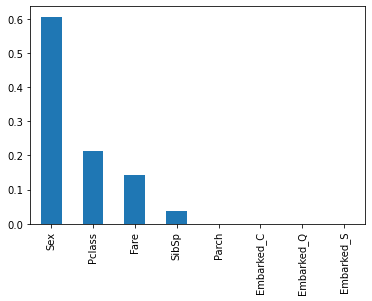

In [236]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=predict)
feature_importances.nlargest(10).plot(kind='bar')


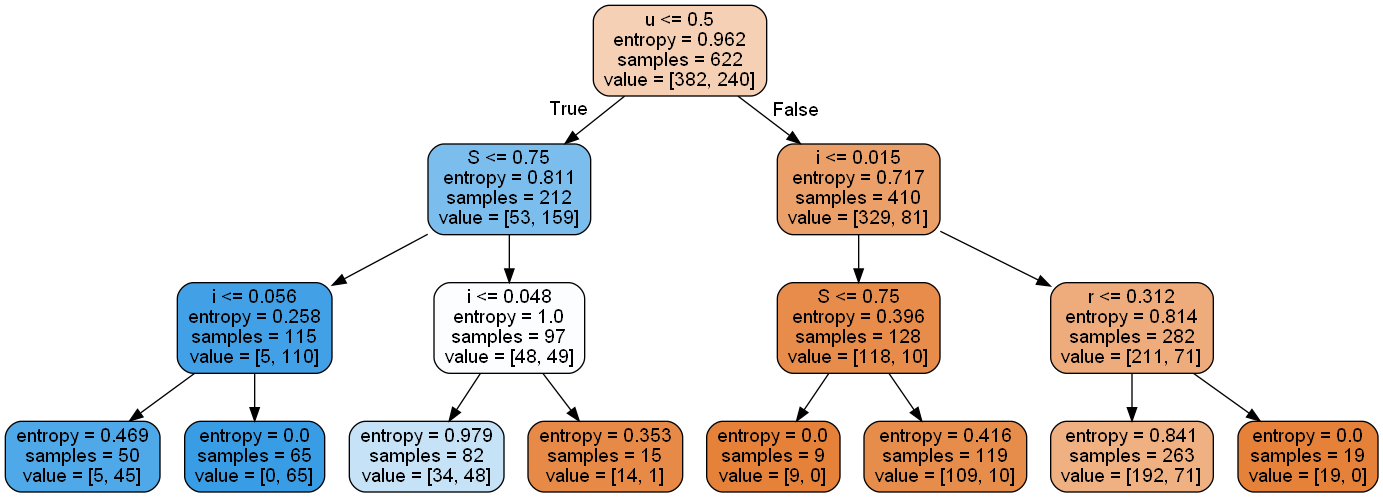

In [237]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
import pydotplus


# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = target,rounded = True, filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree-titanic.png')
# show graph
Image(graph.create_png())

## Random Forest Model

In [238]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose different hyperparameter values of max_depth, n_estimators and criterion to tune the model
clf = RandomForestClassifier(max_depth=4, n_estimators=200,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)


RandomForestClassifier(max_depth=4, n_estimators=200)


In [239]:

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       167
           1       0.79      0.62      0.70       100

    accuracy                           0.80       267
   macro avg       0.80      0.76      0.77       267
weighted avg       0.80      0.80      0.79       267



In [240]:
print(metrics.confusion_matrix(y_test, prediction))


[[151  16]
 [ 38  62]]


In [241]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


Accuracy of the model on Testing Sample Data: 0.79


In [242]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.79319719 0.73447598 0.77256866 0.85131164 0.84054061 0.79924018
 0.80164322 0.71832623 0.8356903  0.7971064 ]

Final Average Accuracy of the model: 0.79


<AxesSubplot:>

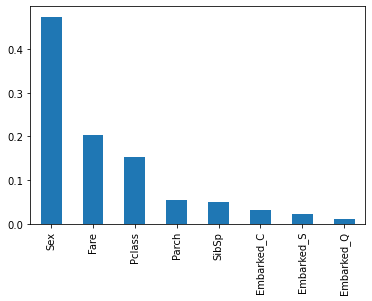

In [243]:
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=predict)
feature_importances.nlargest(10).plot(kind='bar')

#### Decision tree for Random forest

C:\Users\tusha\anaconda3\lib\site-packages\dtreeplt\dtreeplt.py:256: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='', xy=(dx, dy), xytext=(x, y),


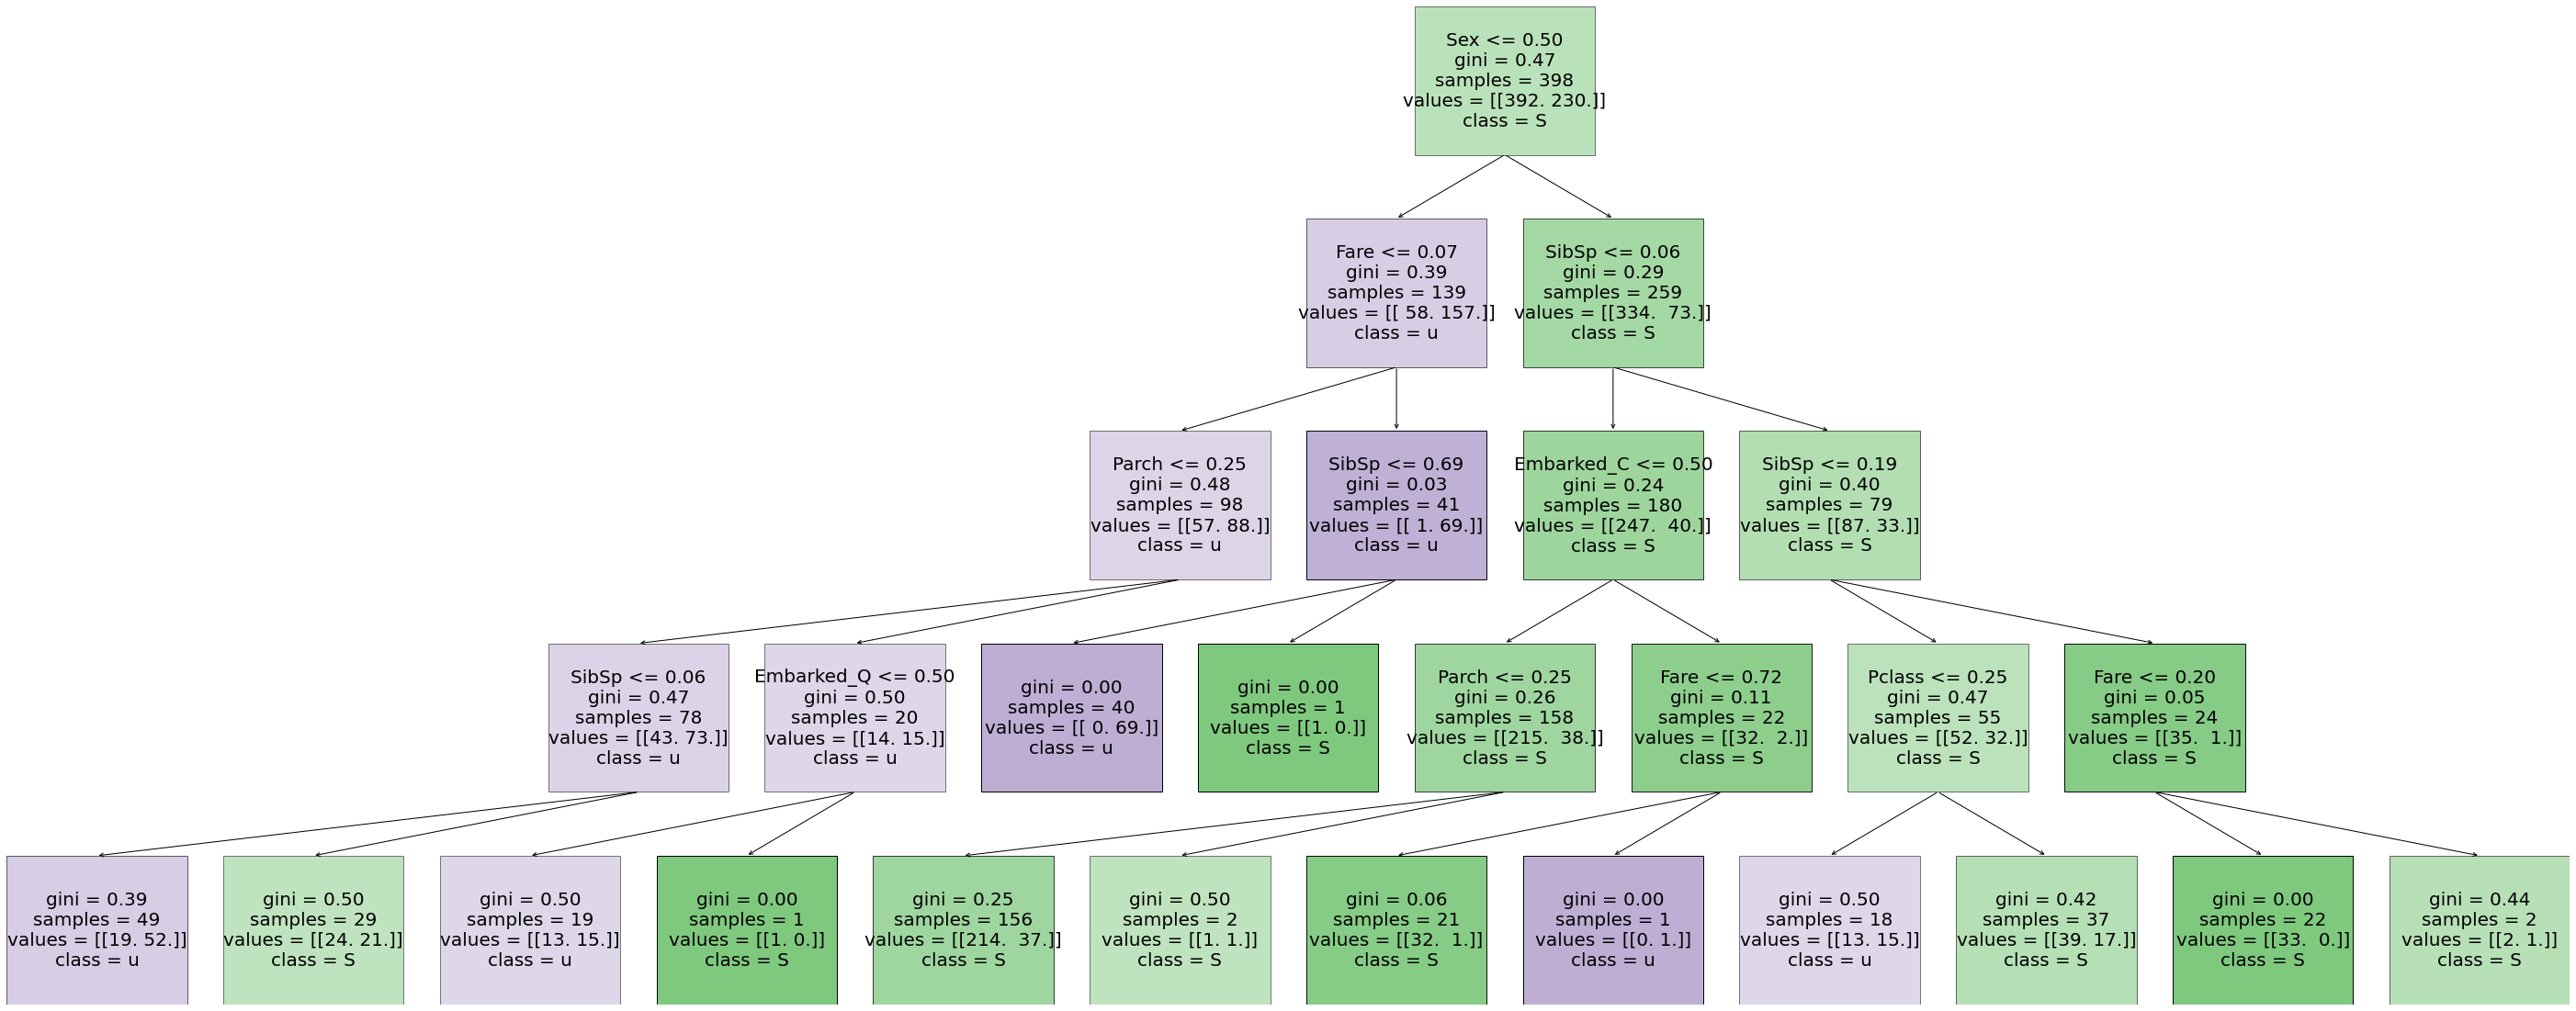

In [244]:
# PLotting a single Decision Tree from Random Forest
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf.estimators_[4], feature_names=predict, target_names=target)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(50,20)

## KNN

In [266]:
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)

# Printing all the parameters of KNN
print(clf)

KNeighborsClassifier(n_neighbors=4)


In [267]:
# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)


In [268]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))


              precision    recall  f1-score   support

           0       0.79      0.90      0.84       167
           1       0.78      0.61      0.69       100

    accuracy                           0.79       267
   macro avg       0.79      0.75      0.76       267
weighted avg       0.79      0.79      0.78       267



In [269]:
print(metrics.confusion_matrix(y_test, prediction))


[[150  17]
 [ 39  61]]


In [270]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


Accuracy of the model on Testing Sample Data: 0.78


In [271]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# There's no method for feature importance in KNN


Accuracy values for 10-fold Cross Validation:
 [0.72150067 0.72468837 0.70074823 0.83321973 0.88510955 0.77021909
 0.81221749 0.77562138 0.8284365  0.82097624]

Final Average Accuracy of the model: 0.79


## Hyperparameter Tuning

In [249]:
from sklearn.model_selection import GridSearchCV

In [261]:
# RandomForestClassifier
parameters = {'n_estimators': [200,700],
             'max_features': ['auto','sqrt','log2'],
             'max_depth': [4,5,6,7,8],
              'criterion':['gini', 'entropy']}

In [262]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [263]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [264]:
GCV.best_params_     # printing the best parameter found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [265]:
mod=RandomForestClassifier(criterion='entropy',max_features='log2', max_depth=6,n_estimators=200)\

mod.fit(X_train,y_train)
pred=mod.predict(X_test)
print(accuracy_score(y_test,pred)*100)

79.40074906367042


## Saving the model

In [272]:
import joblib
joblib.dump(mod,'Titanic.pkl')      #dump is used to serialize the model


# we give pkl file to client

['Titanic.pkl']